<a href="https://www.kaggle.com/code/hakonem/classifying-mushrooms?scriptVersionId=185056258" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mushroom classification project

This is a binary classification: The Target Class contains two values - 0 and 1 - where 0 denotes an edible mushroom and 1 denotes poisonous.   
"Logistic Regression and Support Vector Machines algorithms are natively designed for binary classifications. However, other algorithms such as K-Nearest Neighbors and Decision Trees can also be used for binary classification" (https://www.datacamp.com/blog/classification-machine-learning).

## 1 Import libraries 

In [1]:
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split 

from sklearn import metrics, svm 

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns 

%matplotlib inline 

In [2]:
df = pd.read_csv('/kaggle/input/mushroom-dataset/mushroom_cleaned.csv')

## 2 Inspect the data set 

In [3]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [5]:
# Check if target feature is balanced

df['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

There is a slight imbalance (55:45 in favour of positive class).

## 3 Logistic Regression

In [6]:
# Divide data set into features and target variable

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
# Split data into testing and training data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) 

In [8]:
# Instantiate the model

logreg = LogisticRegression(solver='liblinear')

# Fit model

logreg.fit(X_train, y_train)

# Predict

y_pred = logreg.predict(X_test)

y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [9]:
# Model evaluation with confusion matrix

conf_matrix = metrics.confusion_matrix(y_test, y_pred)

conf_matrix

array([[2636, 2273],
       [1662, 4236]])

Text(0.5, 427.9555555555555, 'Predicted label')

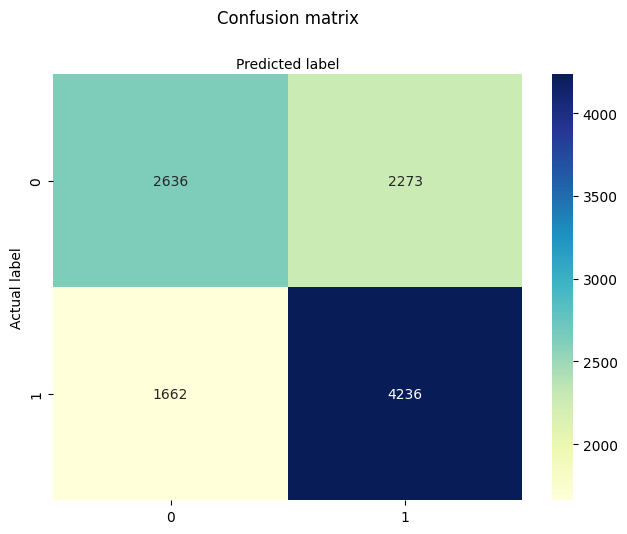

In [10]:
# Visualize confusion matrix as heatmap

class_names = [0,1]

fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)

plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')

ax.xaxis.set_label_position('top')

plt.tight_layout()

plt.title('Confusion matrix', y=1.1)

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

**Accuracy** shows how often a classification ML model is correct overall. 

Accuracy = TP + TN / TP + TN + FP + FN

👍 Helpful when dealing with balanced classes and overall model “correctness” is prioritized over the ability to predict a specific class.

👎 Less useful for imbalanced classes since it gives equal weight to the model’s ability to predict all categories. Can be misleading and disguise low performance on the target class.  

**Precision** shows how often an ML model is correct when predicting the target (positive) class.

Precision = TP / TP + FP

👍 Good for imbalanced classes and when the cost of a FP is high (i.e. when you want to be confident in identifying the target class, even if you miss out on some (or many) instances).   
👎 Does not consider FN (i.e. does not account for the cases when we miss our target event). 

A high precision score => the model has a low false positive rate (i.e. it correctly identifies most positive instances without misclassifying negative instances as positive).


**Recall** shows whether an ML model can find all objects of the target class.   

Recall = TP / TP + FN

👍 Good for imbalanced classes and when the cost of FN is high (i.e. when you want to find all objects of the target class, even if this results in some FP).      
👎 Does not account for cost of FP (i.e. model becomes useless if precision is too low). 

A high recall score => the model is able to correctly identify most positive instances. 

Another metric we can look at is the **F1 score**, which "combines precision and recall into a single metric, providing a balanced measure of a classifier’s performance. It is particularly useful in scenarios where achieving both high precision and high recall is desirable" (https://community.ibm.com/community/user/ai-datascience/blogs/danish-hasarat/2024/03/28/dispelling-the-myth-is-f1-score-actually-better-th#:~:text=Accuracy%20is%20simple%20to%20understand,false%20positives%20and%20false%20negatives).

F1 = 2 * (precision * recall)/(precision + recall)

In [11]:
# Evaluation metrics

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

print('Precision:', metrics.average_precision_score(y_test, y_pred))

print('Recall:', metrics.recall_score(y_test, y_pred))

print('F1 score:', metrics.f1_score(y_test, y_pred))

Accuracy: 0.6358841491625798
Precision: 0.6211936825080056
Recall: 0.7182095625635809
F1 score: 0.6828403320706053


This project deals with the identification of poisonous mushrooms. The recall metric is most useful to us here because it is better to incorrectly flag some safe mushrooms as poisonous than to miss identifying dangerous mushrooms.

The default classification threshold in skikit-learn in 0.5. To optimize for recall, we can set a lower threshold.

Accuracy: 0.6048857222170815
Precision: 0.58632563246215
Recall: 0.8960664632078671
F1 score: 0.7122641509433963


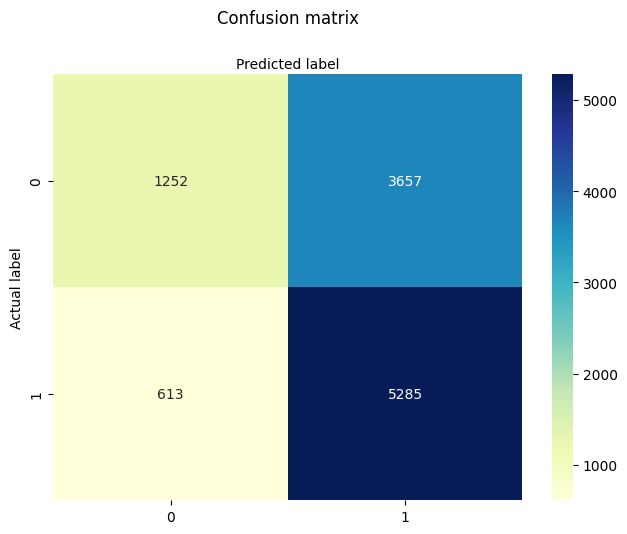

In [12]:
# New prediction with 0.4 decision threshold

y_pred_new_threshold = (logreg.predict_proba(X_test)[:, 1] >= 0.4).astype(int) 

conf_matrix = metrics.confusion_matrix(y_test, y_pred_new_threshold)

class_names = [0,1]

fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)

plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')

ax.xaxis.set_label_position('top')

plt.tight_layout()

plt.title('Confusion matrix', y=1.1)

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

# Evaluation metrics

print('Accuracy:', metrics.accuracy_score(y_test, y_pred_new_threshold))

print('Precision:', metrics.average_precision_score(y_test, y_pred_new_threshold))

print('Recall:', metrics.recall_score(y_test, y_pred_new_threshold))

print('F1 score:', metrics.f1_score(y_test, y_pred_new_threshold))

With a decision threshold of 0.4, the recall has improved considerably (from 72% to 90%), while the precision has only dropped a little (from 62% to 59%). The F1 score, taking into account both of these metrics, is slightly better at 71%. However, the accuracy is poor at only 60%. 

As there is a small imbalance between the classes, we can see if adding a weight to the minority class (non-poisonous mushrooms) will improve the performance of the model.

Accuracy: 0.6441195521421301
Precision: 0.6381595477711134
Recall: 0.6210579857578841
F1 score: 0.6557465091299678


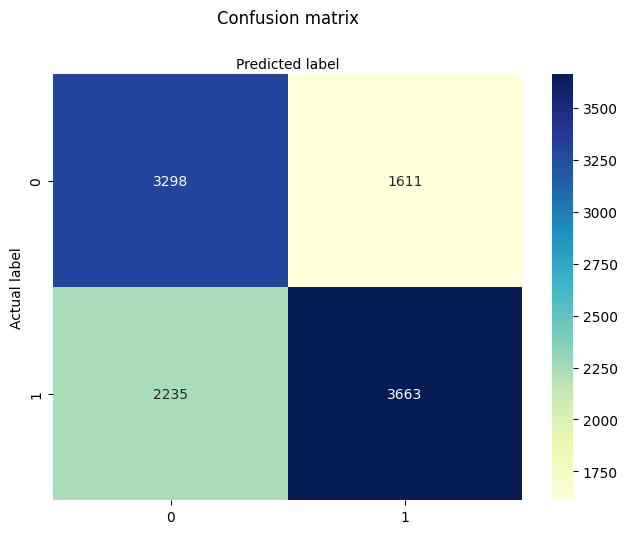

In [13]:
# New prediction with 0.5 decision threshold and balanced class weight

lr_balanced = LogisticRegression(solver='liblinear', class_weight='balanced')

# Fit model

lr_balanced.fit(X_train, y_train)

# Predict

y_pred = lr_balanced.predict(X_test)

# Model evaluation with confusion matrix

conf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]

fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)

plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')

ax.xaxis.set_label_position('top')

plt.tight_layout()

plt.title('Confusion matrix', y=1.1)

plt.ylabel('Actual label')

plt.xlabel('Predicted label')

# Evaluation metrics

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

print('Precision:', metrics.average_precision_score(y_test, y_pred))

print('Recall:', metrics.recall_score(y_test, y_pred))

print('F1 score:', metrics.f1_score(y_test, y_pred))

Using balanced weights (i.e. allocates weights inversely proportional to the class frequencies) improves the accuracy slightly, but results in a poorer F1 score.

What about if we set the weights manually?

In [14]:
# Higher class weight for class 1 (poisonous mushrooms) means the model will favour positive classification
w = {0:0.25, 1:0.75}

lg2 = LogisticRegression(solver='liblinear', class_weight=w)

# fit the model
lg2.fit(X_train,y_train)

# test the model
y_pred = lg2.predict(X_test)

# Evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.average_precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 score:', metrics.f1_score(y_test, y_pred))

Accuracy: 0.5489960210974368
Precision: 0.5480084406335495
Recall: 0.9905052560189895
F1 score: 0.7056407778717237


The relatively low precision score means that the model is incorrectly identifying edible mushrooms as poisonous over 50% of the time, resulting in a lot of wasted mushrooms. However, it almost always identifies the poisonous mushrooms correctly. An F1 score of 0.70 is decent, and reflects the high recall and low precision. 

## 4 SVM

"The SVM algorithm uses a set of mathematical functions defined as kernels. A kernel function is a method that takes data as input and transforms it into the needed form. In other words, the kernel function converts the training data set to convert the nonlinear decision surface into a linear equation in a higher dimensional space.... To choose the right kernel in SVM, we have to take into consideration the type of problem, the computational complexity, and the characteristics of the data." (https://www.baeldung.com/cs/svm-choose-kernel).

**Types of kernel**

* **Linear**
When the number of features is large compared to the number of samples or when the data are linearly separable. Suitable for text classification, document classification, and other high-dimensional data. 

* **Radial Basis Function Kernel (RBF)**
Suitable for nonlinear problems and is the default kernel for SVM. Works well when no prior knowledge of the data, captures complex relationships between data points.

* **Polynomial**
For problems displaying polynomial behavior. Commonly used for computer vision and image recognition tasks. 

* **Sigmoid**
When dealing with neural network applications and when we know that the data distribution looks like a sigmoid function.

* **Customized**
Custom kernels tailored to specific domain knowledge or problem characteristics can outperform standard kernels. 

In [15]:
# Fit the SVM model using default RBF kernel
model = svm.SVC(kernel='rbf')
model.fit(X_train,y_train)
 
# Predict using the SVM model
y_pred = model.predict(X_test)
 
# Evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.average_precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 score:', metrics.f1_score(y_test, y_pred))

Accuracy: 0.6455075414083464
Precision: 0.6307456640208294
Recall: 0.6985418786029163
F1 score: 0.6826277856018557


This SVM model performs similarly to logistic regression with balanced weights for accuracy and precision, but SVM has slightly better recall and F1 score.  

## 5 Random Forest

Random Forest is a popular ML algorithm capable of handling both classification and regression tasks ((https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/).   

Random Forest is an **ensemble** technique using the **bagging** method.   

Ensemble = Combining multiple models to improve the model performance   

Bagging:   
**1. Selecting Subset**: First step is choosing a random subset from the entire dataset.   
**2. Bootstrapping**: Each model is then created from these *Bootstrap Samples*, which are taken from the original data with replacement (AKA *row sampling*).      
**3. Independent Model Training**: Each model is trained independently on its corresponding Bootstrap Sample.   
**4. Aggregation**: The results of all models are combined through majority voting - the most commonly predicted outcome among the models is selected.  

Random Forest is a collection of decision trees. Here are some of the benefits of using RF:
* *Diversity*: Not all attributes/variables/features are included in each individual tree.
* *Immune to the curse of dimensionality*: Since each tree does not include all the features, dimensionality is reduced.
* *Parallelization*: Each tree is created independently from different data/attributes, so we can fully use the CPU to build random forests.
* *Train-Test split*: We don’t have to segregate training and testing data as there will always be 30% of the data which is not seen by each decision tree.
* *Stability*: Stable because the result is based on majority voting.
   
Parameters to improve predictive power
* *n_estimators*: Number of trees the algorithm builds before averaging the predictions.
* *max_features*: Maximum number of features random forest considers splitting a node.
* *mini_sample_leaf*: Determines the minimum number of leaves required to split an internal node.
* *criterion*: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)
* *max_leaf_nodes*: Maximum leaf nodes in each tree

Parameters to improve speed
* *n_jobs*: it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor, but if the value is -1, there is no limit.
* *random_state*: controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and has been given the same hyperparameters and training data.
* *oob_score*: OOB means out of the bag. It is a random forest cross-validation method. In this, one-third of the sample is not used to train the data; instead used to evaluate its performance. These samples are called out-of-bag samples.